Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


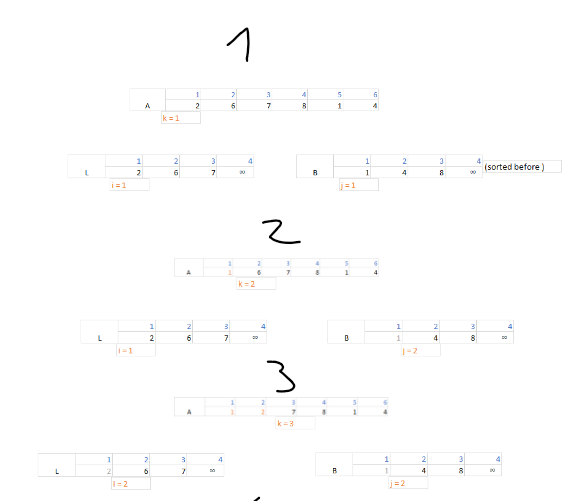

In [2]:
from IPython.display import Image
Image(filename="A1_1.png")


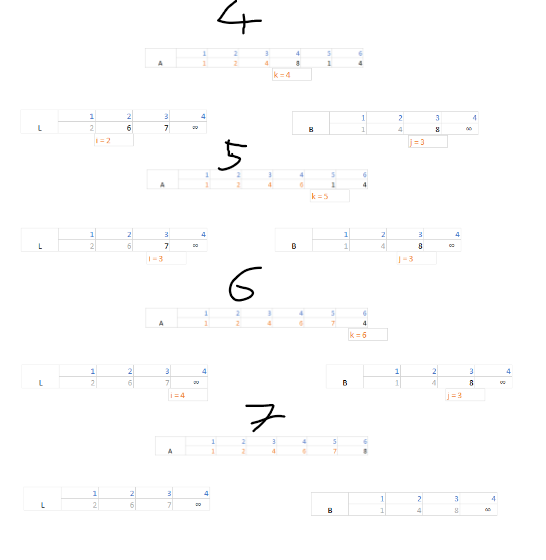

In [3]:
Image(filename="A1_2.png")

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

We can create two new lists L and R, with python and store the list's values according to the input. We can use fewer lines than the pseudocode by defining these lists as slices of the original list A[a:b]. Further, we can use the append() command to add infinity to the list's end.

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

In [4]:
#we import math to use infinity
import math

def merge(A, p, q, r):
    # we define the two new lists R and L 
    L = A[p-1:q]
    R = A[q:r]
    # we add infinity to the end of both lists
    L.append(math.inf)
    R.append(math.inf)
    i = 0
    j = 0
    # we iterate through the original list and merge the two new lists
    for k in range(p-1,r):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
    #  we iterate through the original list and merge the two new lists
    return A
    raise NotImplementedError()

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [6]:

# this function takes a list, and two numbers that define a slice of the list as input and returns the list with the slice sorted
def merge_sort(A,p,r,step):
    #add a step per recursion 
    step.append(0)
    # This checks if p < r and, therefore, if the part of the list is greater than 1
    if p < r:
        # if the slice is not greater than one, this finds the middle value q between p and r
        q = (p+r)//2
        # the function calls itself and repeats the slicing for 2 new slices from p to q and from q+1 to r
        # this happens until the slices have the length 1
        merge_sort(A,p,q,step)
        merge_sort(A,q+1,r,step)
        # now the function calls the merge function and merges two slices in sorted order. 
        merge(A,p,q,r)
        

    # the function returns A that is sorted between p and r
    return A 


In [7]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [8]:
import time

# one iteration for every k form 1 to 15
for k in range(1,16,1):
    #list as given in the problem
    list_k = [i for i in range(100*k, 0, -1)]
    #measures time 
    t0= time.time()
    #step list to 0
    step = []
    # applies merge sort to list
    merge_sort(list_k,1,len(list_k),step)
    #define time and steps 
    t1 = time.time() - t0
    step = len(step)
    #print time and steps needed
    print(t1)
    print(step)
    
#raise NotImplementedError()

0.0
199
0.0014224052429199219
399
0.0020198822021484375
599
0.0019989013671875
799
0.002025127410888672
999
0.0020542144775390625
1199
0.0029892921447753906
1399
0.004649639129638672
1599
0.0074994564056396484
1799
0.004987478256225586
1999
0.005986928939819336
2199
0.006980180740356445
2399
0.007978200912475586
2599
0.005927562713623047
2799
0.007977485656738281
2999


## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

In [9]:
def insertion_sort(A):
    # We set the step counter to 0 before the sorting.
    step = 0
    for j in range(1, len(A)):
        key = A[j]
        i= j-1
        # This variable helps to count the steps. If the while loop is never true, we still want to add a step because two numbers were compared.
        count_help = 0
        while i >= 0 and A[i]>key:
            # The variable is 1 if the while loop gets executed.
            count_help = 1
            #For every iteration of the while loop, we 2 numbers get compared, so we add a step.
            step +=1
            A[i+1] = A[i]
            i -= 1
        # This step is only added if the body of the while loop never got executed. This is because although no numbers got swabs, there was still a comparison.
        if count_help == 0:
            step+=1
        A[i+1] = key
    # After sorting, we return the number of steps.
    return step

    raise NotImplementedError()
    

def bubble_sort(A):
    #We set the step counter to 0 before the sorting.
    step = 0
    for i in range(0,len(A)-1):
        for j in reversed(range(i+1,len(A))):
            #For every iteration of the nested for loop, we add a step because two numbers are compared.
            step +=1
            if A[j] < A[j-1]:
                # A step gets added when numbers not only get compared but also swapped.
                step +=1
                A[j], A[j-1] = A[j-1], A[j]
    # After sorting, we return the number of steps. 
    return step
    raise NotImplementedError()
    
    
def selection_sort(A):
    #We set the step counter to 0 before the sorting.
    step = 0
    n=len(A)
    for i in range(0,n-1):
        minidx = i
        for j in range(i+1,n):
            #For every iteration of the nested for loop, we add a step because two numbers are compared.
            step +=1
            if A[j] < A[minidx]:
                minidx = j
        A[i], A[minidx] = A[minidx], A[i]
    # After sorting, we return the number of steps.
    return step
    raise NotImplementedError()

In [10]:
#define lists to store steps and time for each algorithm
time_merge_sort = []
step_merge_sort= []
time_insertion_sort = []
step_insertion_sort= []
time_bubble_sort = []
step_bubble_sort= []
time_selection_sort = []
step_selection_sort= []
input_size = []




for k in range(1,16,1):
    #list as given in problem
    list_k = [i for i in range(100*k, 0, -1)]
    input_size.append(k*100)
    #measures time 
    tm0= time.time()
    #step list to 0
    step = []
    # applies merge sort to list
    merge_sort(list_k,1,len(list_k),step)
    #define time and steps 
    tm1 = time.time() - tm0
    step = len(step)
    time_merge_sort.append(tm1)
    step_merge_sort.append(step)
    
    
    #measure time and steps for insertion sort
    ti0= time.time()
    i = insertion_sort(list_k)
    ti1 = time.time() - ti0
    # add to right list 
    time_insertion_sort.append(ti1)
    step_insertion_sort.append(i)
    
    
    #measure time and steps for bubble sort 
    tb0 = time.time()
    b = bubble_sort(list_k)
    tb1 = time.time() - tb0
    #add to right list 
    time_bubble_sort.append(tb1)
    step_bubble_sort.append(b)
    
    #measure time and steps for selection sort 
    ts0 = time.time()
    s = selection_sort(list_k)
    ts1 = time.time() - ts0
    #add to right list
    time_selection_sort.append(ts1)
    step_selection_sort.append(s)
    

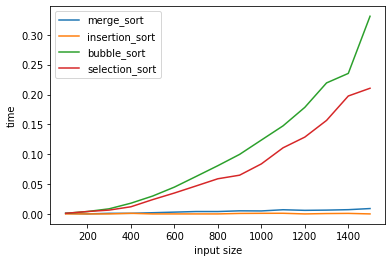

In [15]:
import matplotlib.pyplot as plt

#plot time over input size for all algorithms
plt.plot(input_size,time_merge_sort, label="merge_sort")
plt.plot(input_size,time_insertion_sort, label="insertion_sort")
plt.plot(input_size,time_bubble_sort, label="bubble_sort")
plt.plot(input_size,time_selection_sort, label="selection_sort")
plt.legend()
plt.xlabel("input size")
plt.ylabel("time")
plt.show()

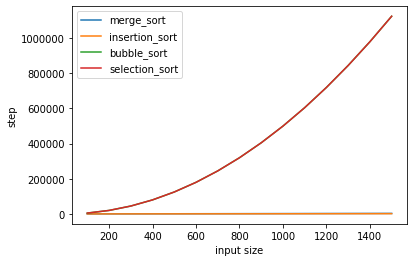

In [12]:
#plot steps to input size
plt.plot(input_size,step_merge_sort, label="merge_sort")
plt.plot(input_size,step_insertion_sort, label="insertion_sort")
plt.plot(input_size,step_bubble_sort, label="bubble_sort")
plt.plot(input_size,step_selection_sort, label="selection_sort")
plt.legend()
plt.xlabel("input size")
plt.ylabel("step")
plt.show()

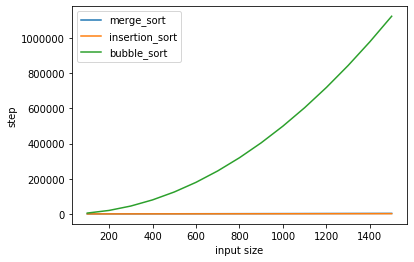

In [13]:
#plot steps to input size
plt.plot(input_size,step_merge_sort, label="merge_sort")
plt.plot(input_size,step_insertion_sort, label="insertion_sort")
plt.plot(input_size,step_bubble_sort, label="bubble_sort")
#plt.plot(input_size,step_selection_sort, label="selection_sort")
plt.legend()
plt.xlabel("input size")
plt.ylabel("step")
plt.show()

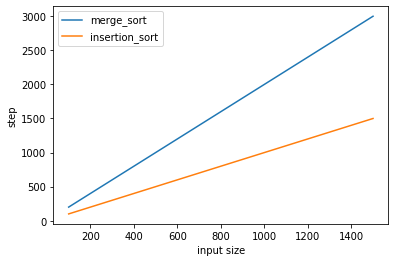

In [14]:
#plot steps to input size
plt.plot(input_size,step_merge_sort, label="merge_sort")
plt.plot(input_size,step_insertion_sort, label="insertion_sort")
#plt.plot(input_size,step_bubble_sort, label="bubble_sort")
#plt.plot(input_size,step_selection_sort, label="selection_sort")
plt.legend()
plt.xlabel("input size")
plt.ylabel("step")
plt.show()

1.
We can see that merge sort and insertion sort have a significantly lower running time than bubble sort and selection sort. We can see that they even have a lower order of growth. While bubble and selection sort increase according to $n^2$, insertion sort and merge sort increase according to $n$. We can see that insertion has the same order of growth, but slightly lower running time. This could be because it is very efficient for small inputs.
2.
We can see that the selection sort performs significantly worse than the rest. To analyze the rest, we look at the graph, excluding selection sort. We can see that now bubble sort performs considerably worse than the rest. Both seem to grow according to $n^2$. Again we have to exclude bubble sort to compare insertion sort with merge sort. While they both seem to increase according to $n$, insertion sort needs slightly fewer steps than merge sort. This could be because it is very efficient for small inputs. 